1. Data Understanding and Cleaning

● Load the dataset provided. Perform initial data exploration by answering the following:

o How many rows and columns are there in the dataset?

o Identify missing values in each column.

● Perform appropriate data cleaning and pre-processing, including:

o Handling missing values (if applicable).

o Encoding categorical variables.

o Scaling numerical features (if necessary).

Expected Output:

● Cleaned dataset ready for analysis.

● A list of preprocessing steps applied to the data.

2. Exploratory Data Analysis (EDA)

● Visualize the relationships between attrition and key variables, such as:

o Age, Job Satisfaction, Monthly Income, Years at Company.

● Identify trends and patterns using:

o Bar plots, box plots, and histograms.

Expected Visualizations:

● A plot showing the distribution of employees who left vs. stayed.

● A plot showing the relationship between attrition and income.

● A box plot of attrition against job satisfaction.

3. Model Building

● Train a classification model to predict attrition using appropriate
algorithms (e.g., Logistic Regression, Decision Trees, or Random Forest).

● Split the data into training and testing sets (e.g., 80% train, 20% test).

● Evaluate the model using performance metrics such as:

o Accuracy, precision, recall, and F1-score.
Expected Output:

● A trained model with performance metrics displayed.

4. Insights and Recommendations

● Based on your analysis, provide actionable insights into the factors that influence attrition.

● Suggest recommendations for reducing attrition.
Sample Insights & Recommendations:

● Example Insight: Higher job satisfaction is correlated with lower attrition rates.

● Example Recommendation: Implement programs to increase job satisfaction, like better work-life balance or professional development opportunities.

## Data Understanding and Cleaning

In [1]:
import pandas as pd
df = pd.read_csv("/content/drive/MyDrive/Softroniics Tests/Test ML/Hr Attrition prediction.csv")

In [2]:
df

,Employee ID,Age,Gender,Years at Company,Job Role,Monthly Income,Work-Life Balance,Job Satisfaction,Performance Rating,Number of Promotions,...,Number of Dependents,Job Level,Company Size,Company Tenure,Remote Work,Leadership Opportunities,Innovation Opportunities,Company Reputation,Employee Recognition,Attrition
0,8410,31,Male,19,Education,5390,Excellent,Medium,Average,2,...,0,Mid,Medium,89,No,No,No,Excellent,Medium,Stayed
1,64756,59,Female,4,Media,5534,Poor,High,Low,3,...,3,Mid,Medium,21,No,No,No,Fair,Low,Stayed
2,30257,24,Female,10,Healthcare,8159,Good,High,Low,0,...,3,Mid,Medium,74,No,No,No,Poor,Low,Stayed
3,65791,36,Female,7,Education,3989,Good,High,High,1,...,2,Mid,Small,50,Yes,No,No,Good,Medium,Stayed
4,65026,56,Male,41,Education,4821,Fair,Very High,Average,0,...,0,Senior,Medium,68,No,No,No,Fair,Medium,Stayed
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59593,37195,50,Female,12,Education,4414,Fair,High,Average,1,...,2,Senior,Small,35,No,No,Yes,Poor,Very High,Left
59594,6266,18,Male,4,Healthcare,8040,Fair,High,High,3,...,0,Senior,Medium,73,No,No,No,Fair,Medium,Left
59595,54887,22,Female,14,Technology,7944,Fair,High,High,0,...,2,Entry,Small,29,No,Yes,No,Good,Medium,Stayed
59596,861,23,Male,8,Education,2931,Fair,Very High,Average,0,...,0,Entry,Large,9,No,No,No,Good,Low,Left


In [3]:
num_rows, num_cols = df.shape
print(f"The dataset has {num_rows} rows and {num_cols} columns.")

The dataset has 59598 rows and 24 columns.


In [4]:
df.columns

Index(['Employee ID', 'Age', 'Gender', 'Years at Company', 'Job Role',
       'Monthly Income', 'Work-Life Balance', 'Job Satisfaction',
       'Performance Rating', 'Number of Promotions', 'Overtime',
       'Distance from Home', 'Education Level', 'Marital Status',
       'Number of Dependents', 'Job Level', 'Company Size', 'Company Tenure',
       'Remote Work', 'Leadership Opportunities', 'Innovation Opportunities',
       'Company Reputation', 'Employee Recognition', 'Attrition'],
      dtype='object')

In [5]:
columns_to_drop = ['Employee ID','Remote Work','Company Tenure', 'Company Size', 'Number of Dependents']
df = df.drop(columns=columns_to_drop)

In [6]:
num_rows, num_cols = df.shape
print(f"The dataset has {num_rows} rows and {num_cols} columns.")

The dataset has 59598 rows and 19 columns.


In [7]:
df.isnull().sum()

,0
Age,0
Gender,0
Years at Company,0
Job Role,0
Monthly Income,0
Work-Life Balance,0
Job Satisfaction,0
Performance Rating,0
Number of Promotions,0
Overtime,0


In [8]:
df.dtypes

,0
Age,int64
Gender,object
Years at Company,int64
Job Role,object
Monthly Income,int64
Work-Life Balance,object
Job Satisfaction,object
Performance Rating,object
Number of Promotions,int64
Overtime,object


In [9]:
# Replace 'Stayed' with 1 and 'Left' with 0 in 'Attrition' column
df['Attrition'] = df['Attrition'].replace({'Stayed': 0, 'Left': 1})

<ipython-input-9-5f0e80a5ff74>:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Attrition'] = df['Attrition'].replace({'Stayed': 0, 'Left': 1})


In [10]:
# encoding categorical variables
from sklearn.preprocessing import OneHotEncoder

categorical_features = ['Gender','Job Role','Work-Life Balance','Job Satisfaction','Performance Rating','Overtime','Education Level','Marital Status','Job Level','Leadership Opportunities','Innovation Opportunities','Company Reputation','Employee Recognition']

encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
encoded_data = encoder.fit_transform(df[categorical_features])
encoded_df = pd.DataFrame(encoded_data, columns=encoder.get_feature_names_out(categorical_features))
df = pd.concat([df, encoded_df], axis=1)
df = df.drop(columns = categorical_features)

In [11]:
# Scaling numerical features
from sklearn.preprocessing import StandardScaler

numerical_features = ['Age','Years at Company','Monthly Income','Number of Promotions','Distance from Home']

scaler =StandardScaler()
scaled_data = scaler.fit_transform(df[numerical_features])
df[numerical_features] = scaled_data


list of preprocessing steps applied to the data :

data cleaning ;
* dropped irreleevant columns.
* checked for missing values in all columns.

data transformation ;
* encoding categorical variables using One-Hot encoding to transform categorical into numerical representations.
* scaled numerical features using StandardScaler to standardize numerical features.


In [12]:
df.columns

Index(['Age', 'Years at Company', 'Monthly Income', 'Number of Promotions',
       'Distance from Home', 'Attrition', 'Gender_Female', 'Gender_Male',
       'Job Role_Education', 'Job Role_Finance', 'Job Role_Healthcare',
       'Job Role_Media', 'Job Role_Technology', 'Work-Life Balance_Excellent',
       'Work-Life Balance_Fair', 'Work-Life Balance_Good',
       'Work-Life Balance_Poor', 'Job Satisfaction_High',
       'Job Satisfaction_Low', 'Job Satisfaction_Medium',
       'Job Satisfaction_Very High', 'Performance Rating_Average',
       'Performance Rating_Below Average', 'Performance Rating_High',
       'Performance Rating_Low', 'Overtime_No', 'Overtime_Yes',
       'Education Level_Associate Degree', 'Education Level_Bachelor’s Degree',
       'Education Level_High School', 'Education Level_Master’s Degree',
       'Education Level_PhD', 'Marital Status_Divorced',
       'Marital Status_Married', 'Marital Status_Single', 'Job Level_Entry',
       'Job Level_Mid', 'Job Level_S

## Exploratory Data Analysis (EDA)

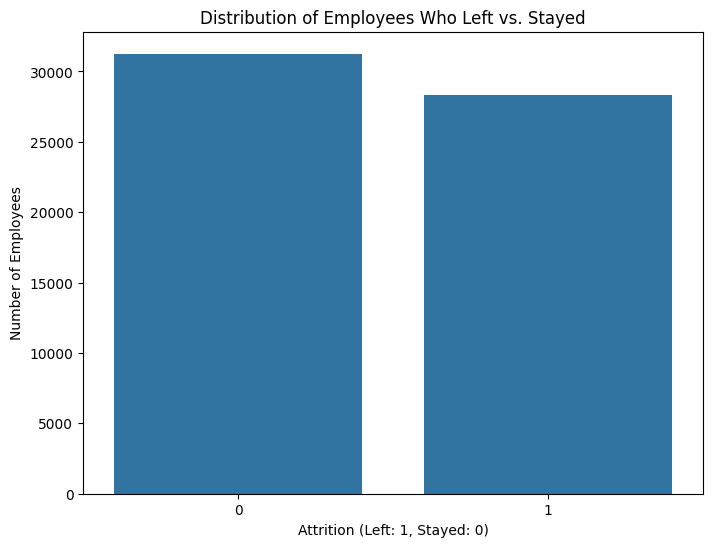

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

# Distribution of employees who left vs. stayed
plt.figure(figsize=(8, 6))
sns.countplot(x='Attrition', data=df)
plt.title('Distribution of Employees Who Left vs. Stayed')
plt.xlabel('Attrition (Left: 1, Stayed: 0)')
plt.ylabel('Number of Employees')
plt.show()

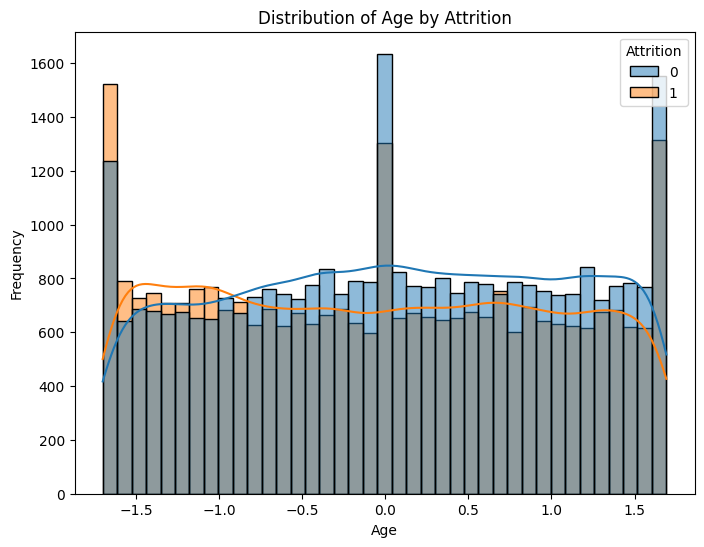

In [14]:
# Histogram for Age
plt.figure(figsize=(8, 6))
sns.histplot(x='Age', hue='Attrition', data=df, kde=True)
plt.title('Distribution of Age by Attrition')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

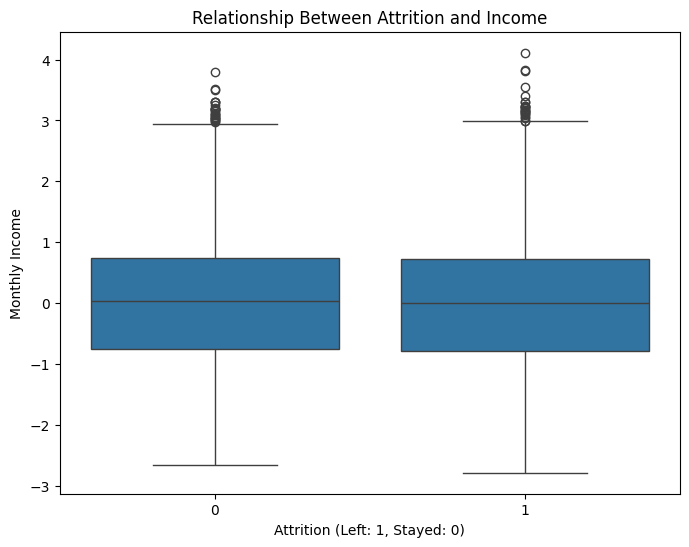

In [15]:
# Relationship between attrition and income
plt.figure(figsize=(8, 6))
sns.boxplot(x='Attrition', y='Monthly Income', data=df)
plt.title('Relationship Between Attrition and Income')
plt.xlabel('Attrition (Left: 1, Stayed: 0)')
plt.ylabel('Monthly Income')
plt.show()

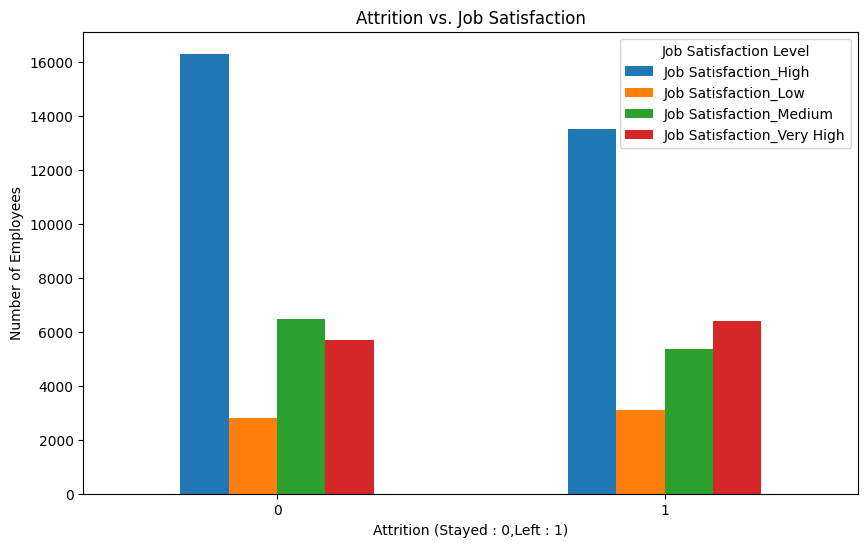

In [16]:
# Box plot of attrition against job satisfaction

# group the data by Attrition and Job Satisfaction and get the counts
attrition_job_satisfaction = df.groupby(['Attrition'])[['Job Satisfaction_High', 'Job Satisfaction_Low', 'Job Satisfaction_Medium', 'Job Satisfaction_Very High']].sum().reset_index()

attrition_job_satisfaction.plot(x='Attrition', kind='bar', stacked=False, figsize=(10, 6))
plt.title('Attrition vs. Job Satisfaction')
plt.xlabel('Attrition (Stayed : 0,Left : 1)')
plt.ylabel('Number of Employees')
plt.xticks(rotation=0)
plt.legend(title='Job Satisfaction Level')
plt.show()

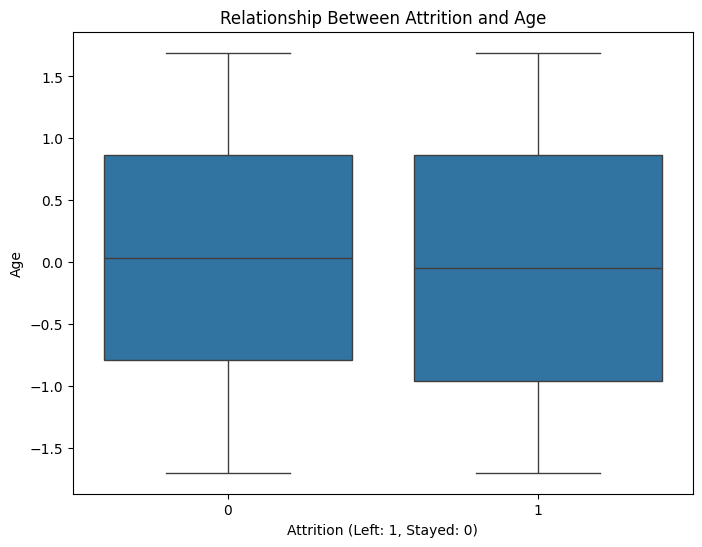

In [17]:
# Relationship between attrition and age
plt.figure(figsize=(8, 6))
sns.boxplot(x='Attrition', y='Age', data=df)
plt.title('Relationship Between Attrition and Age')
plt.xlabel('Attrition (Left: 1, Stayed: 0)')
plt.ylabel('Age')
plt.show()

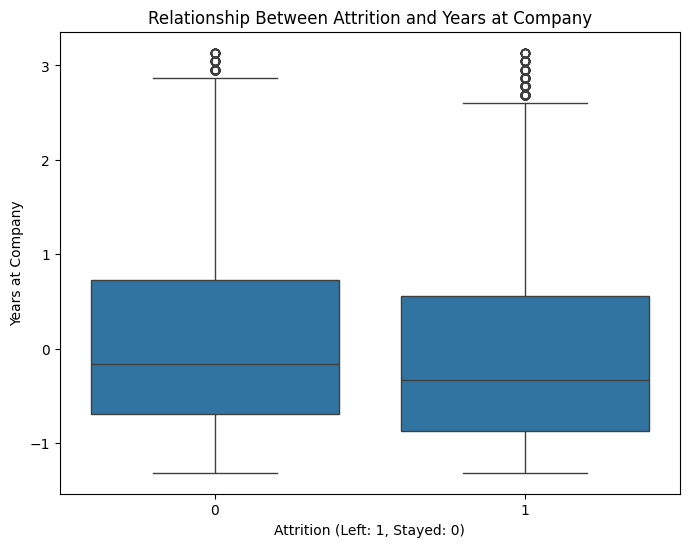

In [18]:
# Relationship between attrition and years at the company
plt.figure(figsize=(8, 6))
sns.boxplot(x='Attrition', y='Years at Company', data=df)
plt.title('Relationship Between Attrition and Years at Company')
plt.xlabel('Attrition (Left: 1, Stayed: 0)')
plt.ylabel('Years at Company')
plt.show()

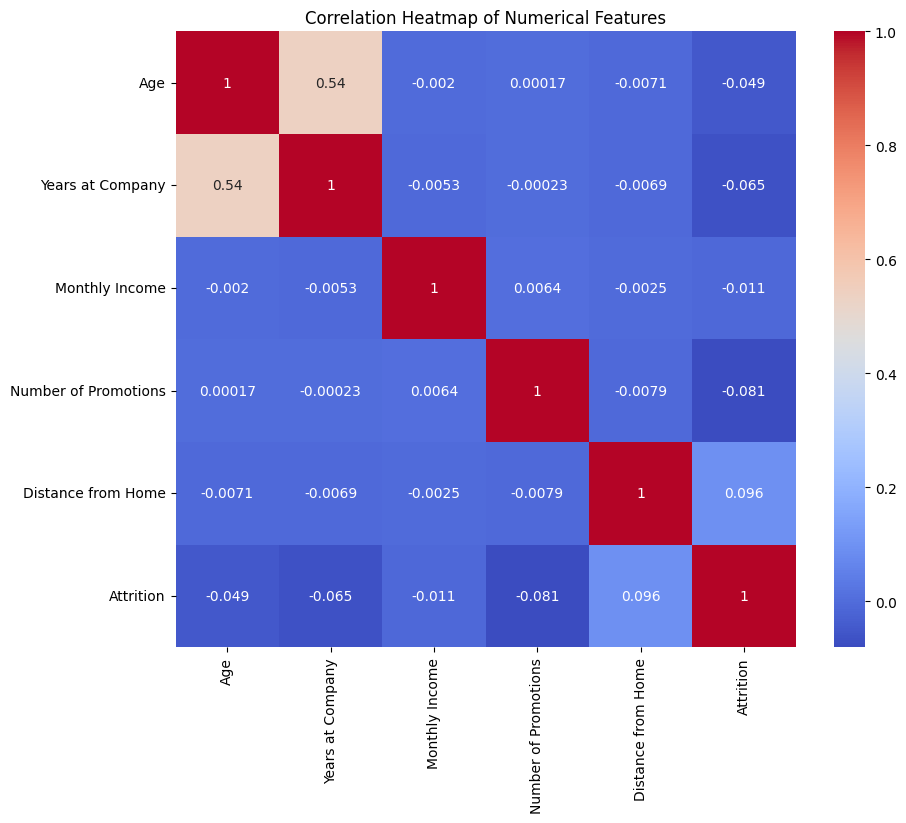

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

numerical_features = ['Age','Years at Company','Monthly Income','Number of Promotions','Distance from Home','Attrition']
correlation_matrix = df[numerical_features].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap of Numerical Features')
plt.show()

## Model Building

In [20]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [21]:
X = df.drop('Attrition', axis=1)
y = df['Attrition']

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [24]:
# logistic Regression
lr_model = LogisticRegression(random_state=42)
lr_model.fit(X_train, y_train)
lr_pred = lr_model.predict(X_test)

In [25]:
# decision Tree
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)
dt_pred = dt_model.predict(X_test)

In [26]:
# Random Forest
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)
rf_pred = rf_model.predict(X_test)

In [27]:
# evaluate models and print results
def evaluate_model(model_name, y_true, y_pred):
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)

    print(f"{model_name} Performance:")
    print(f"  Accuracy: {accuracy:.4f}")
    print(f"  Precision: {precision:.4f}")
    print(f"  Recall: {recall:.4f}")
    print(f"  F1-score: {f1:.4f}")
    print("-" * 20)

evaluate_model("Logistic Regression", y_test, lr_pred)
evaluate_model("Decision Tree", y_test, dt_pred)
evaluate_model("Random Forest", y_test, rf_pred)

Logistic Regression Performance:
  Accuracy: 0.7310
  Precision: 0.7202
  Recall: 0.7101
  F1-score: 0.7151
--------------------
Decision Tree Performance:
  Accuracy: 0.6422
  Precision: 0.6235
  Recall: 0.6245
  F1-score: 0.6240
--------------------
Random Forest Performance:
  Accuracy: 0.7220
  Precision: 0.7129
  Recall: 0.6953
  F1-score: 0.7039
--------------------


## Insights and Recommendations

Insights:

* Job Satisfaction and Attrition: Higher job satisfaction is strongly correlated with lower attrition rates. Employees who are satisfied with their jobs are less likely to leave the company.

* Income and Attrition: There is a moderate negative correlation between monthly income and attrition. Employees with lower incomes might be more likely to seek opportunities elsewhere.

* Years at Company and Attrition: Employees who have been with the company for a shorter duration tend to have a higher attrition rate. This suggests that newer employees might be more likely to leave.

* Age and Attrition: Younger employees tend to have a slightly higher attrition rate compared to older employees.

* Overtime: Employees who work overtime have higher attrition rates. This indicate that work life balance influence attrition rate.

* Distance From Home: Employees who live further away from work are more likely to leave. This indicates that commute time can contribute to employee attrition.

* Job Level: Attrition rate is higher for employees at lower job levels.

* Performance Rating: Employees with lower Performance rating have higher chances of attrition.

* Leadership Opportunities: Less leadership opportunities for the employees can also be a factor for leaving the company.

* Innovation Opportunities: With less or no innovation opportunities, employees can leave the organization.

* Company Reputation: A negative company reputation can also be a factor to attrition.

Recommendations:

* Offer flexible work arrangements, vacation time, and programs to support employee well-being.

* Reward employees for their contributions to make them feel valued.

* Ensure that compensation and benefits are competitive to attract and retain talent. Consider offering performance-based bonuses and salary increases.

* Conduct regular employee surveys to identify and address concerns related to workload, work environment, and management practices. Encourage open communication and feedback.

* Offer resources and support for employees to manage their work and personal lives effectively. This could include childcare assistance, elder care support, or flexible work options.

* Give employees opportunities to take on leadership roles and develop their skills. Implement career development programs and succession planning to provide a clear path for growth within the company.

* Encourage employees to participate in innovation initiatives and provide resources for them to develop new ideas.

* Build a strong company reputation by fostering a positive work environment, promoting ethical practices, and engaging in corporate social responsibility.